In [1]:
import pandas as pd
from IPython.display import HTML, display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("data_preproc.csv")

In [3]:
correlation = df.corr()
correlation

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed asset,bankrupt
net profit / total assets,1.000000,-0.418667,0.352875,0.063453,0.002466,0.387198,0.989017,0.185841,0.163995,0.528367,...,0.004219,0.021388,-0.004395,-0.021087,-0.009729,0.042457,-0.034234,0.174946,0.009089,-0.058435
total liabilities / total assets,-0.418667,1.000000,-0.595951,-0.124420,-0.006831,-0.518823,-0.432239,-0.508322,0.116063,-0.859154,...,-0.013227,-0.019034,0.013172,0.030132,0.023807,-0.012789,0.060325,-0.194406,0.029751,0.080942
working capital / total assets,0.352875,-0.595951,1.000000,0.216199,-0.001459,0.319003,0.371232,0.369517,0.000762,0.542766,...,-0.001370,0.017572,0.001347,-0.022688,-0.024081,-0.068683,-0.048359,0.250482,0.017464,-0.054505
current assets / short-term liabilities,0.063453,-0.124420,0.216199,1.000000,0.001407,0.013914,0.070875,0.267427,-0.027778,0.112920,...,0.001419,0.003400,-0.001429,-0.003874,-0.004489,0.004501,-0.009183,0.781469,0.007878,-0.015788
[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,0.002466,-0.006831,-0.001459,0.001407,1.000000,0.001133,0.002953,0.007004,-0.014442,0.005421,...,-0.000278,-0.000167,0.000280,0.000322,0.000518,-0.005292,0.000735,0.003165,0.000091,0.002236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sales / receivables,0.042457,-0.012789,-0.068683,0.004501,-0.005292,0.019480,0.039709,0.024329,0.133781,0.010434,...,0.006268,0.002997,-0.006258,-0.005982,0.002501,1.000000,-0.014877,0.129986,-0.005590,-0.011771
(short-term liabilities *365) / sales,-0.034234,0.060325,-0.048359,-0.009183,0.000735,-0.035460,-0.035983,-0.027407,-0.049733,-0.053400,...,-0.956628,-0.008586,0.956080,0.009881,0.003213,-0.014877,1.000000,-0.027233,0.000393,0.001531
sales / short-term liabilities,0.174946,-0.194406,0.250482,0.781469,0.003165,0.066356,0.183395,0.283566,0.158588,0.176187,...,0.007805,0.008254,-0.007815,-0.009697,-0.001820,0.129986,-0.027233,1.000000,0.003102,-0.027075
sales / fixed asset,0.009089,0.029751,0.017464,0.007878,0.000091,-0.012290,0.010363,-0.014360,0.022930,-0.025689,...,0.000659,0.003313,-0.000660,-0.000711,-0.000373,-0.005590,0.000393,0.003102,1.000000,-0.000729


In [4]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[:]

print("Top Absolute Correlations")
nos_correlation = pd.DataFrame(get_top_abs_correlations(correlation))

Top Absolute Correlations


In [5]:
main_correlation = nos_correlation[nos_correlation > 0.4].dropna()
display(HTML(main_correlation.to_html()))

In [6]:
display(HTML(main_correlation.reset_index(level=[0]).to_html()))

,level_0,0
total costs /total sales,(sales - cost of products sold) / sales,0.999999
(short-term liabilities * 365) / cost of products sold),(current liabilities * 365) / cost of products sold,0.999998
(gross profit + interest) / total assets,EBIT / total assets,0.999978
constant capital / fixed assets,working capital / fixed assets,0.999955
(sales - cost of products sold) / sales,(inventory * 365) / sales,0.999903
total costs /total sales,(inventory * 365) / sales,0.999896
(net profit + depreciation) / total liabilities,(gross profit + depreciation) / total liabilities,0.999594
(current assets - inventory) / short-term liabilities,current assets / short-term liabilities,0.999522
net profit / sales,gross profit / sales,0.999496
total assets / total liabilities,book value of equity / total liabilities,0.999496


In [7]:
list(main_correlation.reset_index(level=[0]).index)

['total costs /total sales',
 '(short-term liabilities * 365) / cost of products sold)',
 '(gross profit + interest) / total assets',
 'constant capital / fixed assets',
 '(sales - cost of products sold) / sales',
 'total costs /total sales',
 '(net profit + depreciation) / total liabilities',
 '(current assets - inventory) / short-term liabilities',
 'net profit / sales',
 'total assets / total liabilities',
 'EBIT / total assets',
 '(gross profit + interest) / total assets',
 '(short-term liabilities *365) / sales',
 'rotation receivables + inventory turnover in days',
 '(sales - cost of products sold) / sales',
 'total costs /total sales',
 '(receivables * 365) / sales',
 '(short-term liabilities *365) / sales',
 '(current assets - inventory) / short-term liabilities',
 'sales / inventory',
 'long-term liabilities / equity',
 '(gross profit + extraordinary items + financial expenses) / total assets',
 '(gross profit + interest) / total assets',
 '(receivables * 365) / sales',
 'rota

In [8]:
aretirer = list(main_correlation.reset_index(level=[0]).index)
mySet = set(aretirer)
print(mySet)

{'(short-term liabilities * 365) / cost of products sold)', '(total liabilities - cash) / sales', 'working capital / total assets', 'profit on operating activities / total assets', '(current assets - inventory - receivables) / short-term liabilities', 'working capital', 'operating expenses / short-term liabilities', '(short-term liabilities *365) / sales', '(gross profit + interest) / total assets', 'total costs /total sales', '(gross profit + interest) / sales', 'rotation receivables + inventory turnover in days', 'sales / fixed asset', 'profit on operating activities / sales', 'retained earnings / total assets', 'sales / receivables', 'profit on sales / total assets', '(current assets - inventory) / short-term liabilities', 'gross profit / short-term liabilities', 'operating expenses / total liabilities', 'net profit / sales', 'EBITDA (profit on operating activities - depreciation) / sales', 'EBITDA (profit on operating activities - depreciation) / total assets', '(sales - cost of pr

In [9]:
df_clean = df.drop(list(mySet), axis = 1)
df_clean

,net profit / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,sales / total assets,(gross profit + depreciation) / sales,(total liabilities * 365) / (gross profit + depreciation),sales (n) / sales (n-1),profit on operating activities / financial expenses,working capital / fixed assets,(current liabilities * 365) / cost of products sold,(current assets - inventories) / long-term liabilities,total liabilities / ((profit on operating activities + depreciation) * (12/365)),net profit / inventory,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),bankrupt
0,0.174190,1.34800,-28.982,1.19610,0.142330,592.240,0.99690,1.97370,0.324170,100.8200,123140.00000,0.041124,0.946210,0.375740,0
1,0.024526,1.78330,-10.105,1.05090,0.036812,3299.400,0.62795,0.44844,0.738690,103.8100,3.96240,0.180500,0.079819,0.043445,0
2,0.188290,1.92790,-58.274,1.33930,0.187800,602.310,1.20390,44.94700,1.185300,122.0900,4.54900,0.054712,0.364290,0.321880,0
3,0.115030,112.63000,55.580,0.44339,0.325330,92.759,0.82872,61.21000,13.526000,7.2995,58.90700,0.014485,4.782100,0.119400,0
4,0.009832,1.23930,-107.730,1.18250,0.047491,4359.100,1.01300,1.09040,0.453840,217.8100,11.74900,0.251590,0.068029,0.029854,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4880,0.003603,0.89208,-111.350,0.87744,0.052434,6537.600,1.25610,1.08830,-0.082506,194.9700,0.83172,0.325570,0.019030,0.020487,1
4881,0.180780,0.86624,-61.124,3.38170,0.055076,1988.700,0.87190,1.95060,-0.518110,113.5900,13.73800,0.089360,0.390830,-12.164000,1
4882,-0.019241,1.25360,-12.669,1.56360,0.008448,19309.000,0.83444,0.20420,0.066695,46.9790,0.37291,0.596820,-0.188050,-0.063883,1
4883,0.062089,0.64101,-39.505,3.17260,0.042352,2087.400,0.97968,2.73680,-0.283320,63.2470,1.28570,0.150630,0.452100,0.268100,1


In [10]:
correlation2 = df_clean.corr()
correlation2

,net profit / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,sales / total assets,(gross profit + depreciation) / sales,(total liabilities * 365) / (gross profit + depreciation),sales (n) / sales (n-1),profit on operating activities / financial expenses,working capital / fixed assets,(current liabilities * 365) / cost of products sold,(current assets - inventories) / long-term liabilities,total liabilities / ((profit on operating activities + depreciation) * (12/365)),net profit / inventory,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),bankrupt
net profit / total assets,1.000000,0.063453,0.002466,0.163995,-0.005536,-0.002609,-0.015049,0.023261,0.029252,-0.000257,0.003636,0.011982,0.017958,0.021388,-0.058435
current assets / short-term liabilities,0.063453,1.000000,0.001407,-0.027778,-0.001908,-0.004502,-0.003301,0.003879,0.080811,-0.003165,-0.000046,-0.001375,0.003638,0.003400,-0.015788
[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,0.002466,0.001407,1.000000,-0.014442,0.000229,-0.001648,0.000225,0.000240,0.000333,0.000507,0.000673,0.000219,-0.000142,-0.000167,0.002236
sales / total assets,0.163995,-0.027778,-0.014442,1.000000,-0.006985,0.009278,-0.011601,-0.001828,0.008629,0.024917,-0.002834,-0.000038,0.018354,0.014717,0.069774
(gross profit + depreciation) / sales,-0.005536,-0.001908,0.000229,-0.006985,1.000000,-0.001151,-0.000428,-0.000182,-0.000190,-0.000213,-0.000608,0.000128,0.001031,0.001045,-0.002366
(total liabilities * 365) / (gross profit + depreciation),-0.002609,-0.004502,-0.001648,0.009278,-0.001151,1.000000,-0.003970,-0.001047,-0.000319,-0.001276,-0.002707,-0.000597,0.002747,0.003717,0.087065
sales (n) / sales (n-1),-0.015049,-0.003301,0.000225,-0.011601,-0.000428,-0.003970,1.000000,-0.000257,-0.000727,0.000228,-0.000706,-0.000230,0.000175,-0.000174,-0.002504
profit on operating activities / financial expenses,0.023261,0.003879,0.000240,-0.001828,-0.000182,-0.001047,-0.000257,1.000000,-0.000416,-0.000395,-0.000608,-0.000218,0.000263,0.000557,-0.002226
working capital / fixed assets,0.029252,0.080811,0.000333,0.008629,-0.000190,-0.000319,-0.000727,-0.000416,1.000000,0.000065,-0.000464,-0.000497,0.000717,0.003053,-0.001099
(current liabilities * 365) / cost of products sold,-0.000257,-0.003165,0.000507,0.024917,-0.000213,-0.001276,0.000228,-0.000395,0.000065,1.000000,-0.000616,-0.000312,0.000100,-0.000052,-0.001982


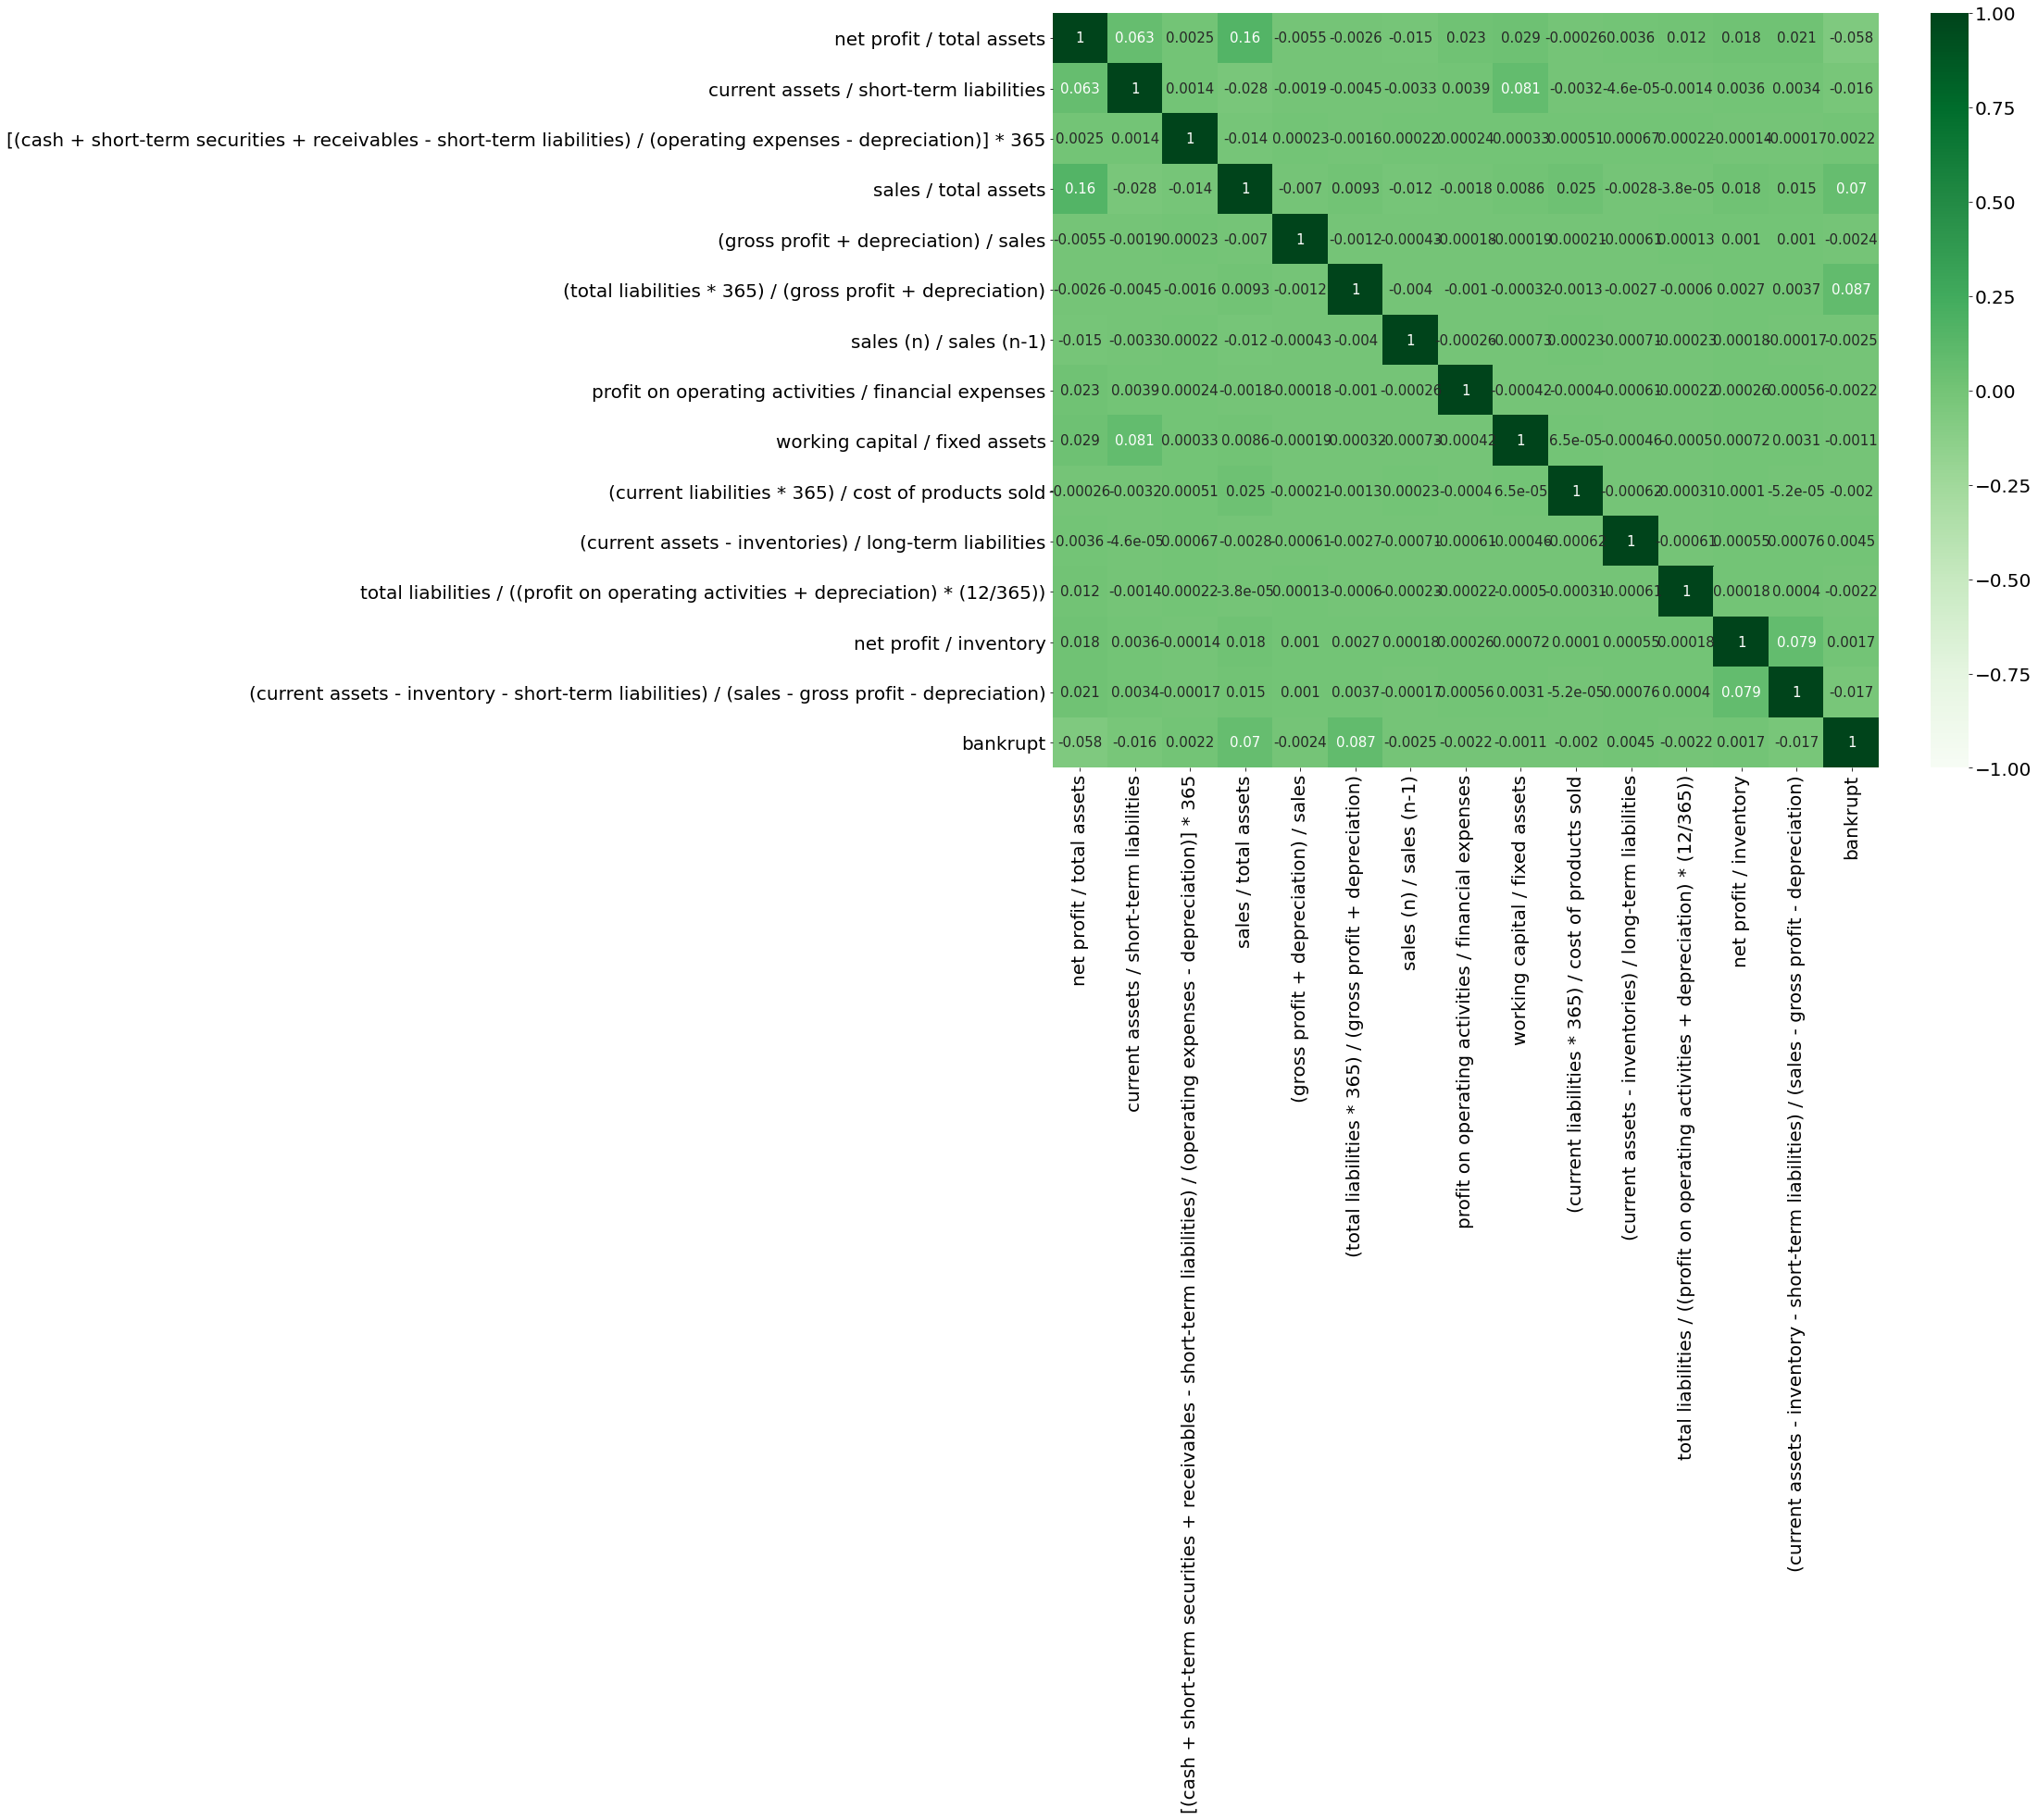

In [11]:
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(1, 1, figsize=(20,15))
sns.heatmap(correlation2, vmin=-1, vmax=1, annot=True, ax=ax, cmap=plt.cm.Greens)
plt.show()


## Simplifying columns name

In [15]:
correlation2.columns

Index(['net profit / total assets', 'current assets / short-term liabilities',
       '[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365',
       'sales / total assets', '(gross profit + depreciation) / sales',
       '(total liabilities * 365) / (gross profit + depreciation)',
       'sales (n) / sales (n-1)',
       'profit on operating activities / financial expenses',
       'working capital / fixed assets',
       '(current liabilities * 365) / cost of products sold',
       '(current assets - inventories) / long-term liabilities',
       'total liabilities / ((profit on operating activities + depreciation) * (12/365))',
       'net profit / inventory',
       '(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)',
       'bankrupt'],
      dtype='object')

In [ ]:
df.rename(columns ={"net profit / total assets": "ROA", 
                   "working capital / fixed assets": "Working capital on fixed Ratio", "current assets / short-term liabilities": "Current ratio",
                   "[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365": "DIR by year",
                    "sales / total assets": "Sales Ratio", "(gross profit + depreciation) / sales": "gross profit depreciation",
                    "sales (n) / sales (n-1)":"sales previous on actual year","profit on operating activities / financial expenses": "Cash Flow on financial expenses",
                    
                   })

In [12]:
df_clean.to_csv("../Analyse_Exploratoire/data_without_correlation.csv", index = False)